# ANALYST TIMELINE STOCK

In [84]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os

## *------1. Process and Analyze close data by year------*

` Making more flexible for input csv files `

In [85]:
Direction=r'E:\My_Plan\DataAnalyst\Project\DA_timeseries\individual_stocks_5yr'.replace('\\','/')
print(Direction)
def inname():
    input_name=input('Please Input the name of CSV files you want,\nseperated by comma with format\n*.csv: ')
    input_name_list=input_name.split(',')
    real_direct=[]
    for i in input_name_list:
        real_direct.append(Direction+r'/'+i)
    return real_direct


E:/My_Plan/DataAnalyst/Project/DA_timeseries/individual_stocks_5yr


` Create blank dataframe `

In [86]:
input_name_list=inname()
keepgoing=True
df=pd.DataFrame()

` Checking all input if all of them is exist in a specific path, It'll work and vice versa  `

In [87]:
while keepgoing:
    for j in input_name_list:
        if os.path.exists(j)==True:
            current_df=pd.read_csv(j)
            df=pd.concat([df,current_df])
            keepgoing=False
        else: 
            print("Checking again file's name\n\tOne / All of them is / are wrong")
            input_name_list=inname()

Checking again file's name
	One / All of them is / are wrong
Checking again file's name
	One / All of them is / are wrong
Checking again file's name
	One / All of them is / are wrong


In [88]:
df.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL
1,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL
2,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL
3,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL
4,2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL


` Covert date from str to datetime type `

In [89]:
name=df['Name'].unique()
df['date']=pd.to_datetime(df['date'])
df.dtypes

date      datetime64[ns]
open             float64
high             float64
low              float64
close            float64
volume             int64
Name              object
dtype: object

` Visualize the result `

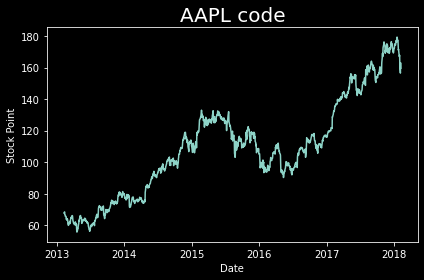

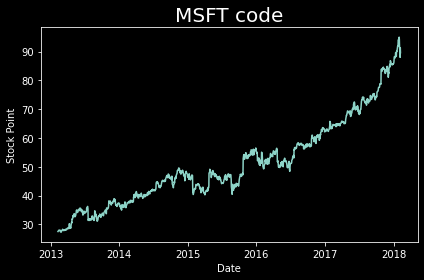

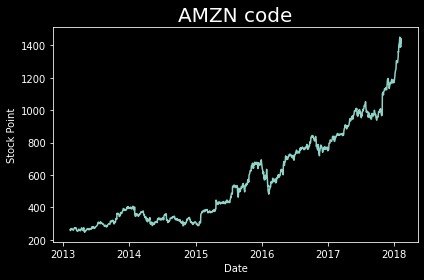

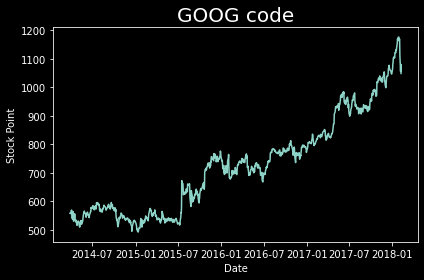

In [90]:
t=0
# rows=int(input('Number of rows for showing char: '))
# col=int(input('Number of column for showing char: '))
#plt.figure(figsize=(15,5))
for company in name:
    plt_df=df[df['Name']==company]
    t+=1
    #plt.subplot(1,2,t) #plt.subplot(rows,col,t)
    plt.plot(plt_df['date'],plt_df['close'])
    plt.title(company+' code',fontsize=20)
    plt.xlabel('Date')
    plt.ylabel('Stock Point')
    plt.tight_layout()
    plt.show()

------------------------------------------------

## *------2. Processing and visualize close-stock point ------*

` Processing close-point data using pivot table following companies `

In [91]:
df_close=df.pivot_table(values='close',index=['date'],columns='Name')
df_close.dropna(inplace=True)
mean_close_groupby=df_close.resample('M').mean() #grup by data by Month (M). Depend on the final purpose, you can change 'resapmle (...)' to month,quarter,...
company_list=list(name)
#mean_close_groupby

` Visualize data `

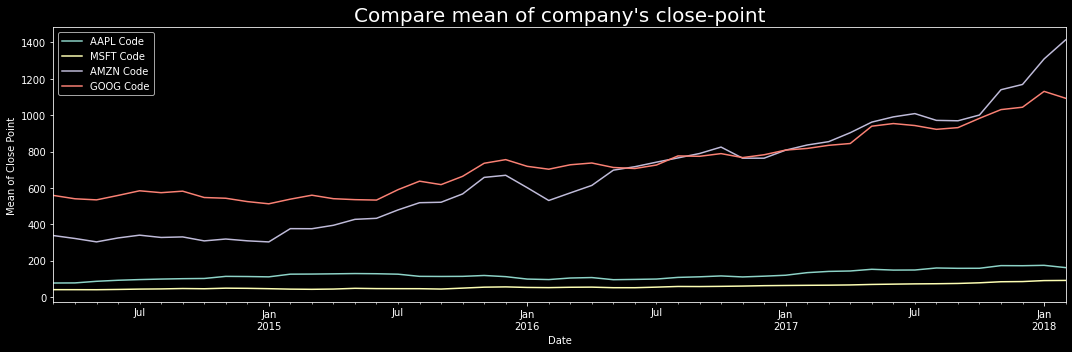

In [92]:
plt.figure(figsize=(15,5)) #set up figure size 
for i in company_list:
    mean_close_groupby[i].plot(label=i+' Code')
    plt.title("Compare mean of company's close-point",fontsize=20)
    plt.legend()
    plt.xlabel('Date')
    plt.ylabel('Mean of Close Point')
    plt.tight_layout()

-------------------------------------------------

## *------3. Finding which having a good corellation and visualize that ------*

` You can use maybe two ways to perform the correlation `
* ` Op1: If you feel good when seeing graphs to find corrlation, You can use only "sns.pairplot()" `
* ` Op2: If you not sure when seeing graphs or you need a strongly figure to show off this correlation, You can use "sns.heatmap()" and "pd.corr()" `

` Op1 `

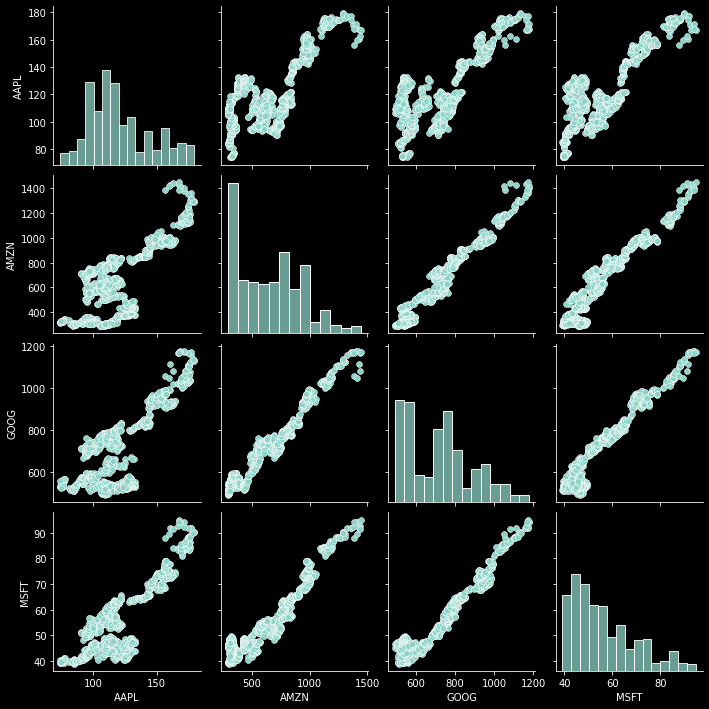

In [93]:
sns.pairplot(data=df_close)

` Op2 `

Name,AAPL,AMZN,GOOG,MSFT
Name,,,,
AAPL,1.000000,0.760835,0.755274,0.834091
AMZN,0.760835,1.000000,0.978721,0.954601
GOOG,0.755274,0.978721,1.000000,0.967981
MSFT,0.834091,0.954601,0.967981,1.000000


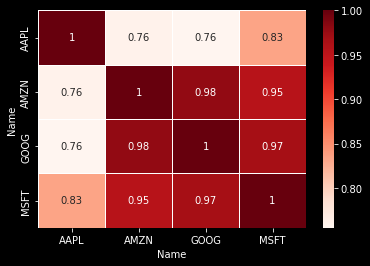

In [94]:
dfclose_corr_fig=df_close.corr(method='pearson')
sns.heatmap(data=dfclose_corr_fig,annot=True,cmap='Reds',linewidths=.8)
dfclose_corr_fig

-----------------------------------------

## *------4. Analyze Description shows percentage between close and open point of stock------* 

` Processing and Taking data which You need to Analyze `

C:\Users\DELL\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


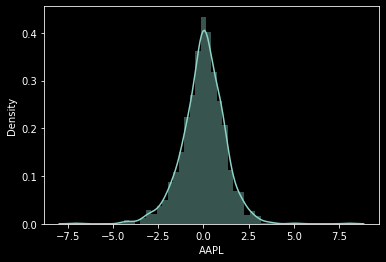

C:\Users\DELL\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


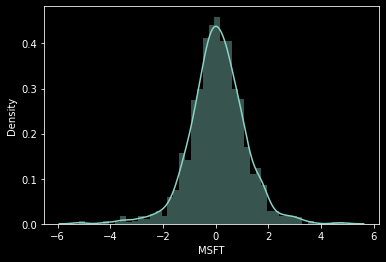

C:\Users\DELL\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


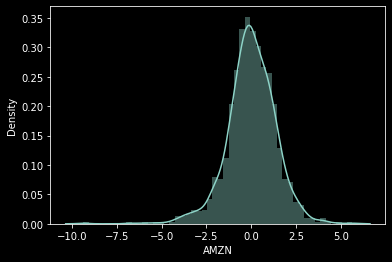

C:\Users\DELL\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


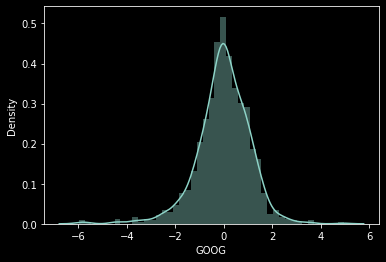

,AAPL,MSFT,AMZN,GOOG
0,0.206325,0.725953,0.209964,-1.708269
1,0.714688,0.753769,-2.328836,-0.216075
2,-2.481344,0.000000,-0.189409,-1.781065
3,-0.042869,0.356761,2.946525,1.489879
4,0.443624,0.427960,0.694548,0.334039
...,...,...,...,...
1254,0.366551,-0.562275,-3.956835,NaN
1255,-3.426791,-2.026585,-3.317599,NaN
1256,-1.667838,-2.909091,-0.907914,NaN
1257,5.029749,4.861491,5.640265,NaN


In [95]:
df_change_percent=pd.DataFrame()
for i in name:
    df_comm=df[df['Name']==i]
    df_change_percent[i]=(df_comm['close']-df_comm['open'])/df_comm['close']*100
    sns.distplot(df_change_percent[i])
    plt.show()
df_change_percent

In [96]:
df_change_percent.describe().T

,count,mean,std,min,25%,50%,75%,max
AAPL,1259.0,-0.000215,1.187138,-7.104299,-0.658021,0.042230,0.715427,8.000388
MSFT,1259.0,0.076404,1.059260,-5.177618,-0.509241,0.061069,0.703264,4.861491
AMZN,1259.0,-0.000398,1.358679,-9.363077,-0.738341,-0.002623,0.852568,5.640265
GOOG,975.0,-0.012495,1.092560,-5.952266,-0.551963,0.024951,0.672649,4.943550
